# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).
* Convert Raw Data to DataFrame


In [3]:
# Dataframe to store 
data_df = pd.DataFrame()

for city in cities:
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    print(f"Checking weather in {city}")
    data = requests.get(url).json()

    try:
        tmp_df = pd.DataFrame([{
            'City':data['name'],
            'Lat':data['coord']['lat'],
            'Lon':data['coord']['lon'],
            'Max Temp':data['main']['temp_max'],
            'Humidity':data['main']['humidity'],
            'Cloudiness':data['clouds']['all'],
            'Wind Speed':data['wind']['speed'],
            'Country':data['sys']['country'],
            'Date':data['dt']
        }])
        # Collect each city's weather data into the dataframe.
        data_df = data_df.append(tmp_df, ignore_index=True)
    # Some cities may not be real and return any data
    except KeyError:
        print(f"One or more data points missing for {city}")




 points missing for saleaula
Checking weather in sars
Checking weather in noyabrsk
Checking weather in lagoa
Checking weather in semenivka
Checking weather in mackay
Checking weather in porbandar
Checking weather in punta arenas
Checking weather in padang
Checking weather in tezu
Checking weather in bluff
Checking weather in chuy
Checking weather in sibuco
Checking weather in porto novo
Checking weather in ilulissat
Checking weather in tumannyy
One or more data points missing for tumannyy
Checking weather in cairns
Checking weather in albany
Checking weather in warri
Checking weather in jamestown
Checking weather in barentsburg
One or more data points missing for barentsburg
Checking weather in hithadhoo
Checking weather in barrow
Checking weather in erenhot
Checking weather in sentyabrskiy
One or more data points missing for sentyabrskiy
Checking weather in atuona
Checking weather in myitkyina
Checking weather in kysyl-syr
Checking weather in bandar-e lengeh
Checking weather in coihai

* Export the city data into a .csv.
* Display the DataFrame

In [4]:
data_df.to_csv('city_weather_data.csv', encoding='utf-8')
data_df.head()


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kumul,42.8000,93.4500,48.13,35,1,4.88,CN,1615674990
1,Boralday,43.3578,76.8594,21.20,93,90,8.95,KZ,1615675223
2,Longyearbyen,78.2186,15.6401,-5.21,94,95,4.61,SJ,1615675068
3,Rikitea,-23.1203,-134.9692,80.47,73,39,8.34,PF,1615675224
4,Conceição do Araguaia,-8.2578,-49.2647,75.61,88,57,1.57,BR,1615675225


In [5]:
# Show statistical summary
data_df.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,20.522306,16.563037,54.185577,71.774423,51.396092,8.402043,1.615675e+09
std,33.079988,89.405380,27.274715,21.243980,39.169280,6.143410,1.831778e+02
min,-54.800000,-179.166700,-22.900000,4.000000,0.000000,0.250000,1.615675e+09
25%,-6.243150,-62.728350,36.000000,60.000000,8.000000,4.000000,1.615675e+09
50%,25.021300,20.900000,63.000000,76.000000,52.000000,6.910000,1.615675e+09
75%,47.633250,93.175000,76.825000,88.000000,90.000000,11.500000,1.615675e+09
max,78.218600,178.416700,96.370000,100.000000,100.000000,37.490000,1.615676e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Check to see whether there are any cities with 100% humidity
data_df[data_df['Humidity'] >= 100]


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
20,Sibuco,7.2911,122.0656,75.2,100,75,1.14,PH,1615675234
117,Dumas,35.8656,-101.9732,63.0,100,75,17.27,US,1615675281
299,Qiongshan,20.0058,110.3542,66.2,100,20,2.24,CN,1615675379
321,Kalmar,56.6616,16.3616,36.0,100,90,2.95,SE,1615675392
349,Martapura,-3.4167,114.8500,73.4,100,75,4.61,ID,1615675407
356,Kualakapuas,-3.0091,114.3876,73.4,100,75,4.61,ID,1615675411
358,Kota Belud,6.3510,116.4305,75.2,100,40,2.30,MY,1615675412
400,Alyangula,-13.8483,136.4192,77.0,100,63,3.44,AU,1615675138
506,Vrnjačka Banja,43.6167,20.9000,37.4,100,0,2.30,RS,1615675494
516,Mae Sai,20.4335,99.8762,60.8,100,13,4.61,TH,1615675498


In [7]:
# Get the indices of cities that have humidity over 100%.
# See https://www.webpages.uidaho.edu/~stevel/cheatsheets/Pandas%20DataFrame%20Notes_12pages.pdf for how to get indices of matched rows
idx = data_df[data_df['Humidity'] >= 100].index
print(idx)

Int64Index([20, 117, 299, 321, 349, 356, 358, 400, 506, 516, 522, 525], dtype='int64')


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = data_df.drop(idx, inplace=False)

In [9]:
# Let's confirm there are no cities with 100% humidity
clean_city_data[clean_city_data['Humidity'] >= 100]

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

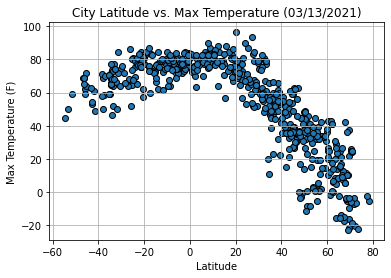

In [10]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], edgecolors='black')
plt.title("City Latitude vs. Max Temperature (03/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("latitude_maxtemp.png")
plt.show()

## Latitude vs. Humidity Plot

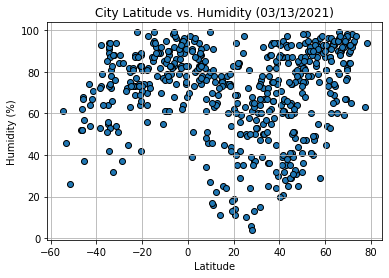

In [11]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], edgecolors='black')
plt.title("City Latitude vs. Humidity (03/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("latitude_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

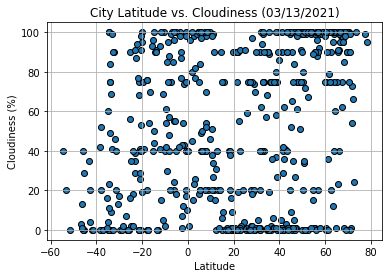

In [12]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], edgecolors='black')
plt.title("City Latitude vs. Cloudiness (03/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("latitude_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

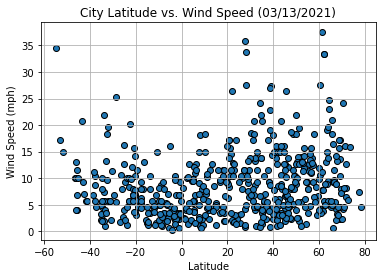

In [13]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], edgecolors='black')
plt.title("City Latitude vs. Wind Speed (03/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("latitude_windspeed.png")
plt.show()

## Linear Regression

In [14]:
#clean_city_data[clean_city_data['Lat'] >= 0]['Lat']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8754487317194316


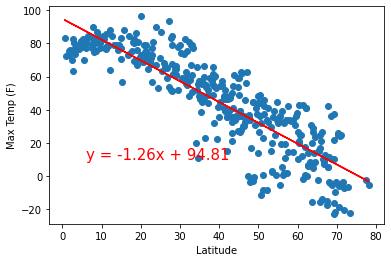

In [15]:
x_values = clean_city_data[clean_city_data['Lat'] >= 0]['Lat']
y_values = clean_city_data[clean_city_data['Lat'] >= 0]['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-value is: {rvalue}")
plt.savefig("north_latitude_maxtemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6101609049778839


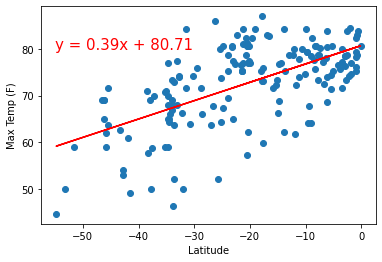

In [16]:
x_values = clean_city_data[clean_city_data['Lat'] <= 0]['Lat']
y_values = clean_city_data[clean_city_data['Lat'] <= 0]['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-value is: {rvalue}")
plt.savefig("south_latitude_maxtemp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.27821336032189975


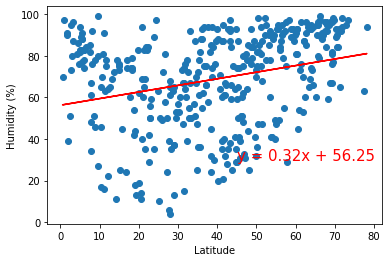

In [17]:
x_values = clean_city_data[clean_city_data['Lat'] >= 0]['Lat']
y_values = clean_city_data[clean_city_data['Lat'] >= 0]['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.savefig("north_latitude_humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.49195359899624524


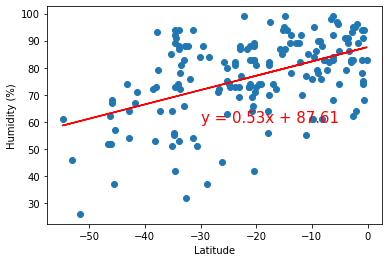

In [18]:
x_values = clean_city_data[clean_city_data['Lat'] <= 0]['Lat']
y_values = clean_city_data[clean_city_data['Lat'] <= 0]['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.savefig("south_latitude_humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.283356725230331


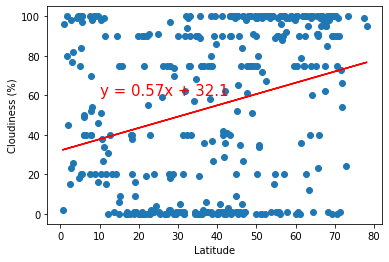

In [19]:
x_values = clean_city_data[clean_city_data['Lat'] >= 0]['Lat']
y_values = clean_city_data[clean_city_data['Lat'] >= 0]['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.savefig("north_latitude_cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.399018398046162


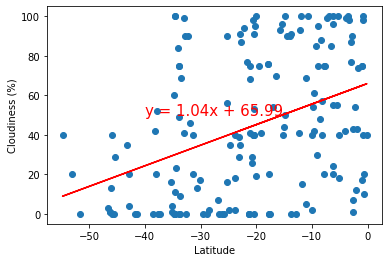

In [20]:
x_values = clean_city_data[clean_city_data['Lat'] <= 0]['Lat']
y_values = clean_city_data[clean_city_data['Lat'] <= 0]['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.savefig("south_latitude_cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.14539615574757583


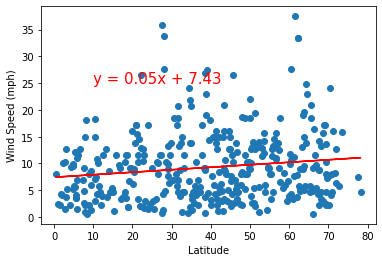

In [21]:
x_values = clean_city_data[clean_city_data['Lat'] >= 0]['Lat']
y_values = clean_city_data[clean_city_data['Lat'] >= 0]['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.savefig("north_latitude_wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3953878503973958


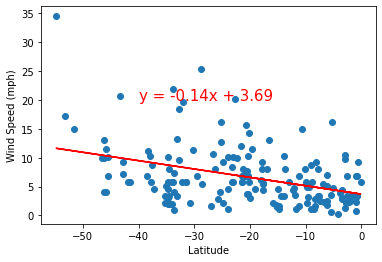

In [22]:
x_values = clean_city_data[clean_city_data['Lat'] <= 0]['Lat']
y_values = clean_city_data[clean_city_data['Lat'] <= 0]['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.savefig("south_latitude_wind.png")
plt.show()
